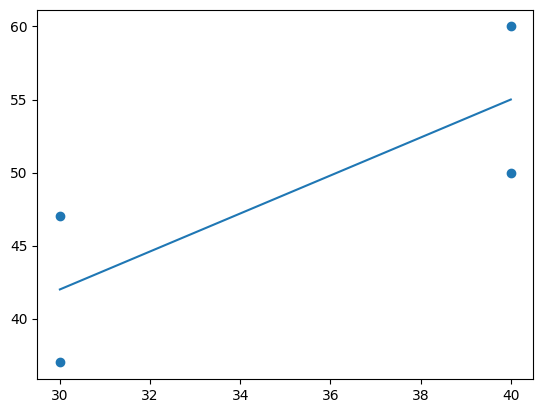

0.6282527881040891


In [2]:
import numpy as np
from matplotlib import pyplot as plt

#у = b1 * x + b0, где х - влияющий параметр
X1 = np.array([30,30,40, 40])
Y1 = np.array([37, 47, 50, 60])
b1 = (np.mean(X1 * Y1) - np.mean(Y1) * np.mean(X1)) / (np.mean(X1 ** 2) - np.mean(X1) ** 2)
b0 = np.mean(Y1) - b1 * np.mean(X1)
#print(b1, b0)  #1.3 * x + 3.0
plt.scatter(X1, Y1)
plt.plot(X1, b1 * X1 + b0)
plt.show()
R = np.corrcoef(X1, Y1)[0, 1] ** 2 # на сколько модель описывает реальные данные
print(R)

In [8]:
X1 = X1.reshape((12, 1)) ## y = b1 * x
Y1 = Y1.reshape((12, 1)) ## y = b1 * x + b0
X2 = np.hstack([np.ones((12, 1)), X1])
B = np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T @ Y1)
print(B)

ValueError: cannot reshape array of size 4 into shape (12,1)

In [ ]:
def mse(B1, B0, X1, Y1, n):
    return np.sum((B0 + B1 * X1 - Y1)) ** 2 / n
alpha = 5e-5 #скорость обучения
B0 = 4
B1 = 1
n = 0.1
for i in range(10 ** 6):
    B1 -= alpha * (2/n) * np.sum((B0 + B1 * X1 - Y1) * X1)
    B0 -= alpha * (2/n) * np.sum((B0 + B1 * X1 - Y1))
    if i % 50000 == 0:
        print(B1, B0, mse(B1, B0, X1, Y1, n))

1.0113333333333334 4.0003034444444445 110.48687087733931
1.2727193315007832 3.9742940120081984 0.0005054731071924126
1.2736130381354434 3.942376428219292 0.0004728972809337082
1.2744774672049715 3.9115044550390348 0.00044242084323014647
1.275313577833744 3.8816438385730865 0.0004139084964452399
1.2761222977255116 3.8527614470743856 0.0003872336623636442
1.276904524192718 3.824825234182274 0.0003622779202535067
1.2776611251521173 3.7978042033653936 0.00033893048115205904
1.2783929400877732 3.7716683735293905 0.0003170876960246128
1.279100780982494 3.746388745751915 0.0002966525956255803
1.2797854332187715 3.721937271106691 0.0002775344600076624
1.280447656450203 3.6982868195418863 0.0002596484157822605
1.281088185444355 3.675411149778229 0.00024291505932764185
1.2817077308980278 3.6532848801929405 0.00022726010428464794
1.2823069802258025 3.6318834606578085 0.00021261405177022013
1.2828865983227635 3.6111831452994374 0.00019891188183786984
1.2834472283022285 3.5911609661523016 0.0001860